In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torchvision as tv
from PIL import Image

from core.datasets import get_ds

In [3]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test', back=3, batch_size=1)

In [11]:
def draw_aug_ds(transformer):
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        img = np.array(transformer(Image.fromarray((train_ds[i][0][0] * 255).astype(np.uint8), 'RGB')))
        plt.imshow(img / 255, cmap=plt.cm.binary)
        plt.title(train_ds[i][1][0])
        plt.axis('off')
    plt.show()

In [36]:
crop = tv.transforms.CenterCrop(size=(28, 22))
inverter = tv.transforms.RandomInvert(p=0.4)
posterizer = tv.transforms.RandomPosterize(bits=6, p=0.4)
jitter = tv.transforms.ColorJitter(brightness=.2, hue=0.2, contrast=0.5)
perspective = tv.transforms.RandomPerspective(distortion_scale=0.2, p=0.4)
affine = tv.transforms.RandomAffine(degrees=(-15, 15), translate=(0, 0.1), scale=(0.85, 1))
gray_scale = tv.transforms.Grayscale(num_output_channels=3)
solarizer = tv.transforms.RandomSolarize(threshold=100.0, p=0.4)
equalizer = tv.transforms.RandomEqualize(p=0.4)

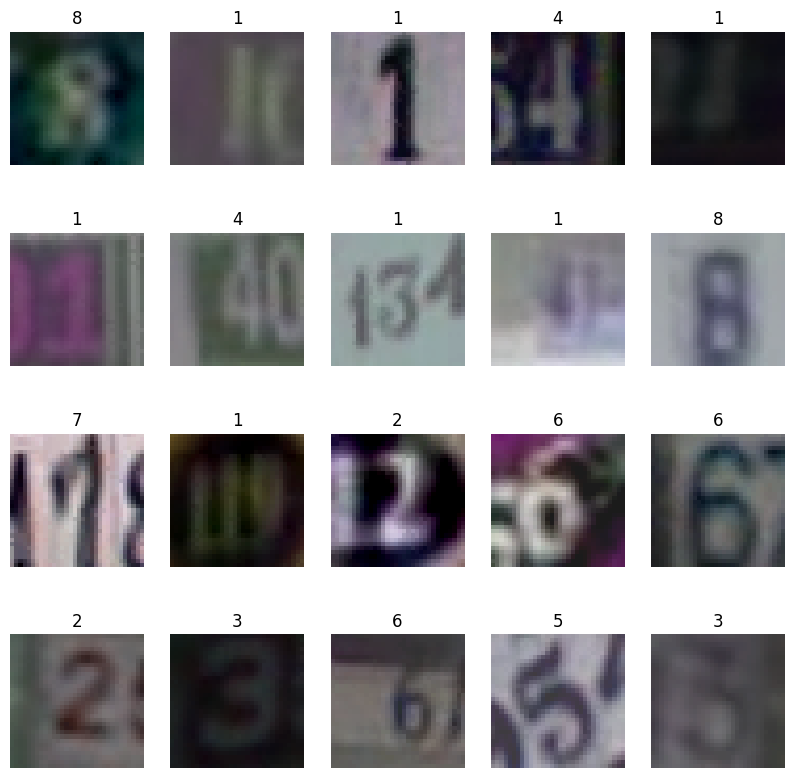

In [26]:
transformer1 = tv.transforms.Compose([
    jitter,
    inverter
])
train_ds.transform = transformer1
draw_aug_ds(transformer1)

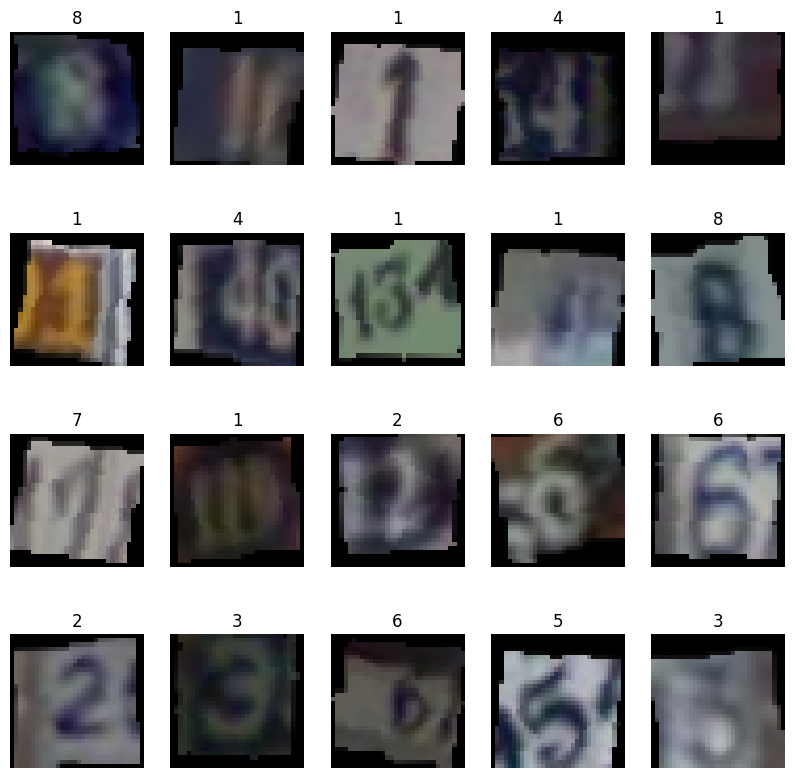

In [20]:
transformer2 = tv.transforms.Compose([
    tv.transforms.RandomPerspective(distortion_scale=0.1, p=1.0),
    tv.transforms.RandomAffine(degrees=(-7, 7), translate=(0, 0.1), scale=(0.95, 1))
])
train_ds.transform = transformer2
draw_aug_ds(transformer2)

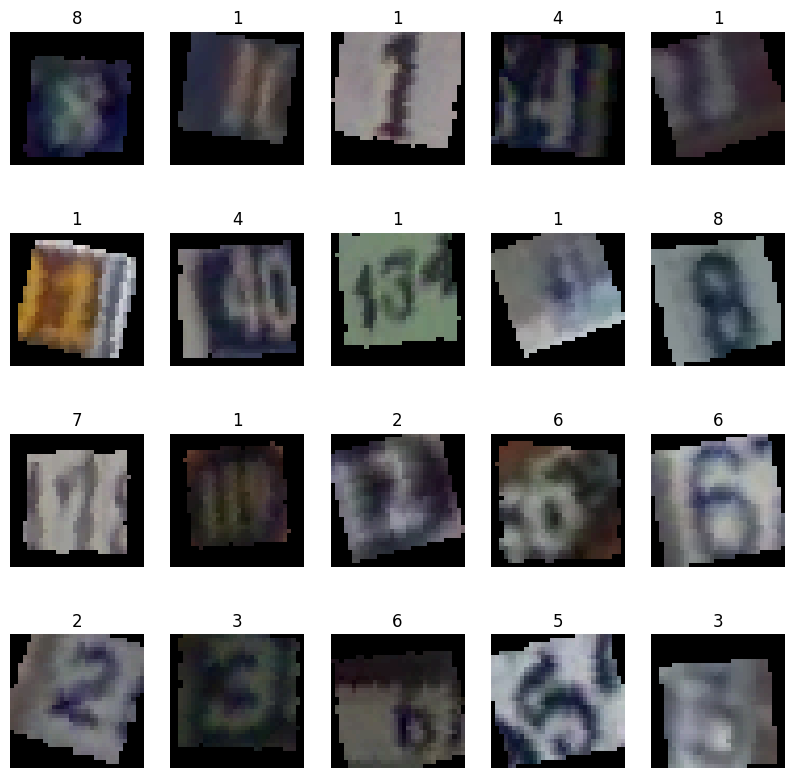

In [37]:
transformer3 = tv.transforms.Compose([
    posterizer,
    affine,
])
train_ds.transform = transformer3
draw_aug_ds(transformer3)

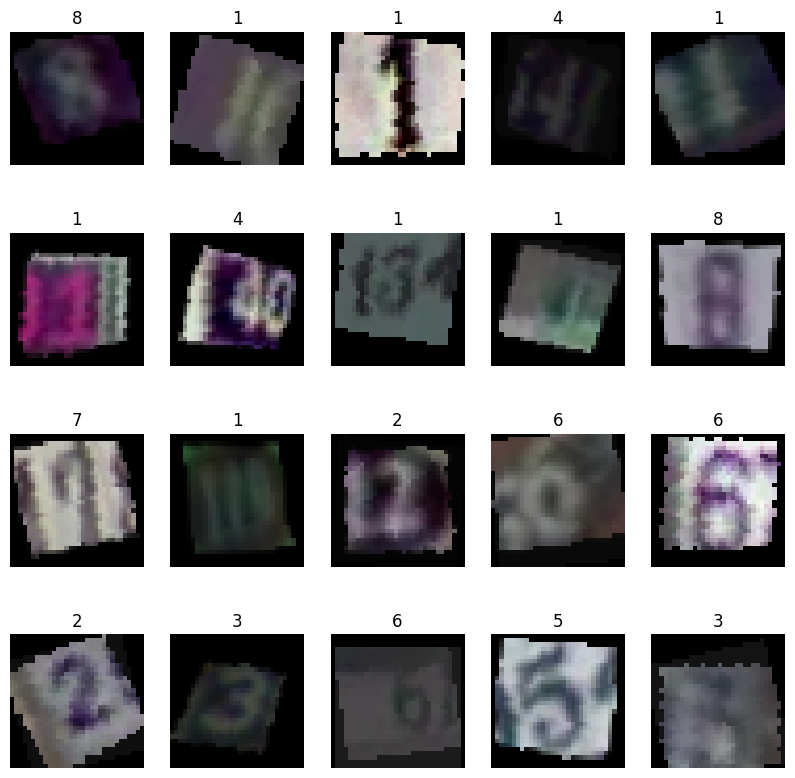

In [38]:
transformer4 = tv.transforms.Compose([
    jitter,
    affine,
    perspective
])
train_ds.transform = transformer4
draw_aug_ds(transformer4)

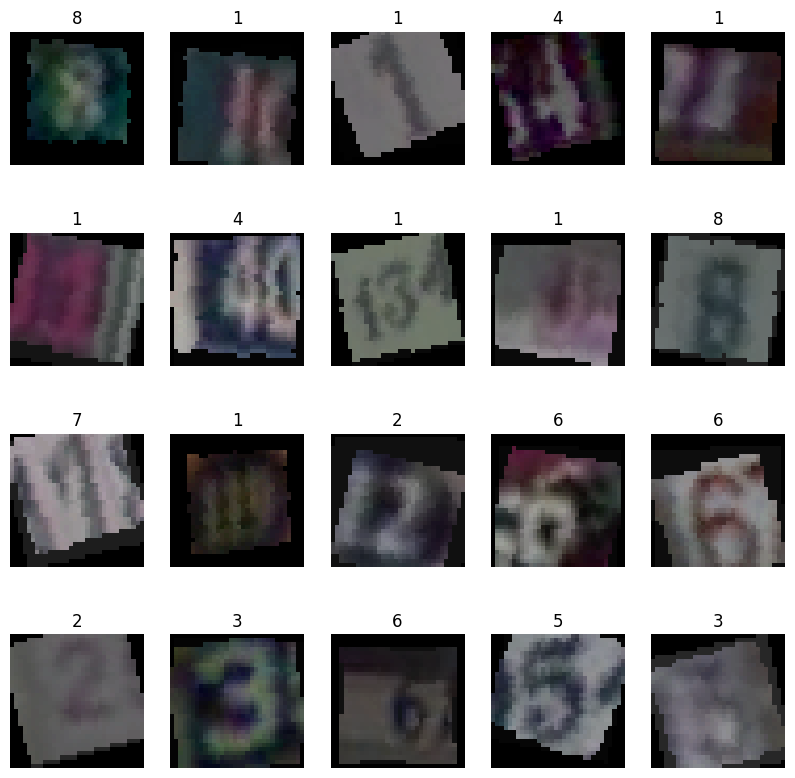

In [47]:
transformer5 = tv.transforms.Compose([
    posterizer,
    jitter,
    affine,
])
train_ds.transform = transformer5
draw_aug_ds(transformer5)

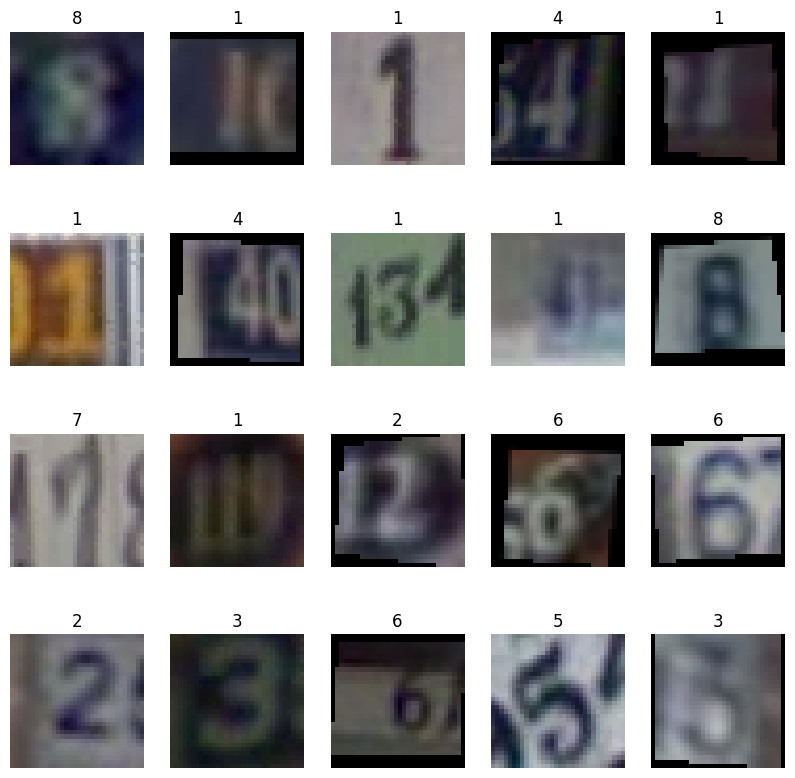

In [48]:
transformer6 = tv.transforms.Compose([
    posterizer,
    perspective
])
train_ds.transform = transformer6
draw_aug_ds(transformer6)

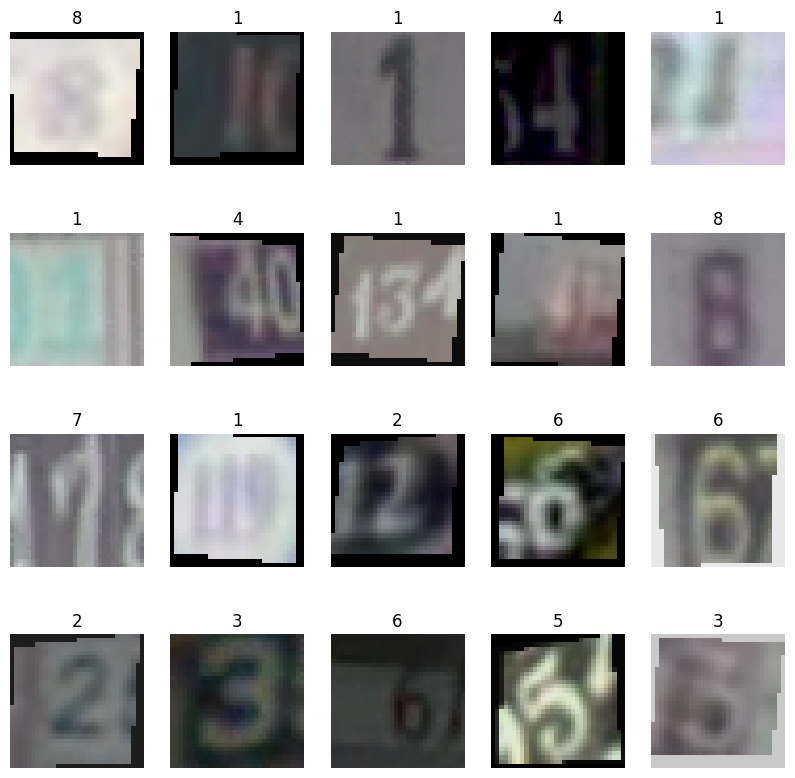

In [49]:
transformer7 = tv.transforms.Compose([
    jitter,
    inverter,
    perspective
])
train_ds.transform = transformer7
draw_aug_ds(transformer7)

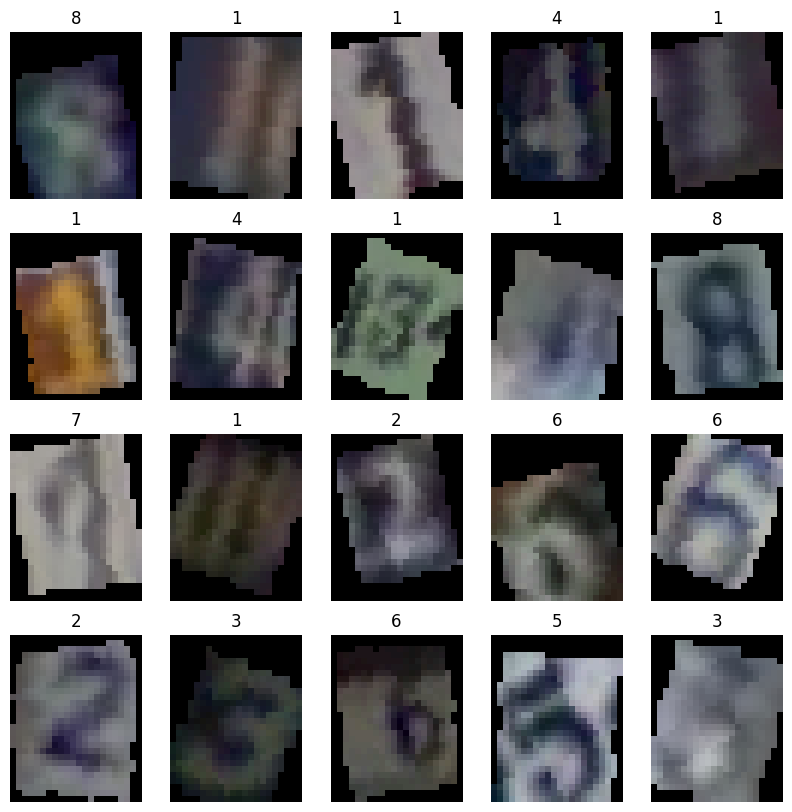

In [51]:
transformer8 = tv.transforms.Compose([
    crop,
    posterizer,
    affine
])
train_ds.transform = transformer8
draw_aug_ds(transformer8)

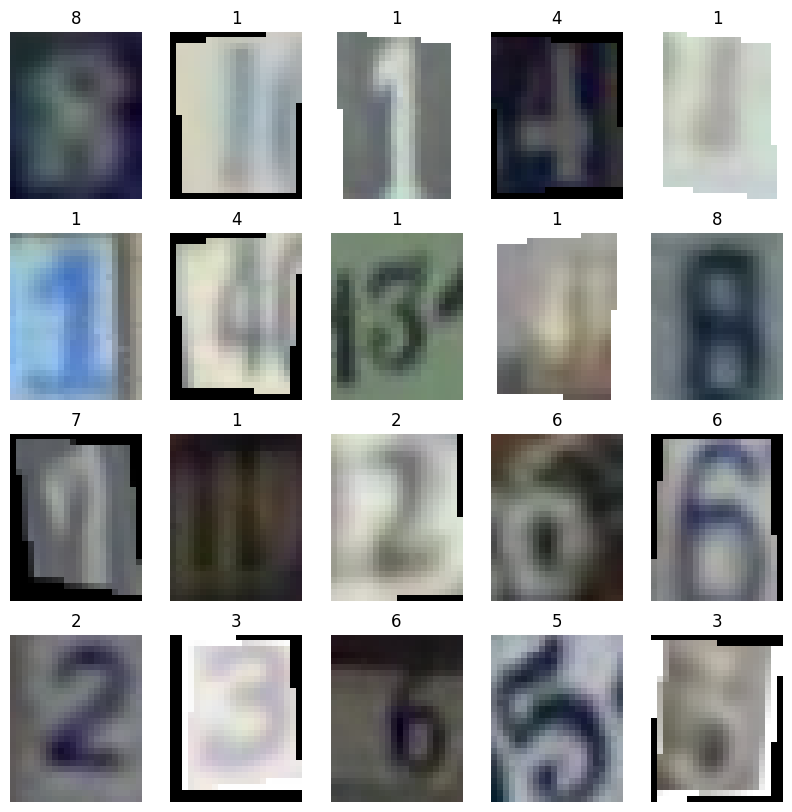

In [52]:
transformer9 = tv.transforms.Compose([
    crop,
    inverter,
    perspective,
])
train_ds.transform = transformer9
draw_aug_ds(transformer9)